In [1]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
titanic = pd.read_csv('C:\\Users\\Ashish\\train.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [75]:
titanic.shape

(891, 18)

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [6]:
pd.set_option('display.float_format', '{:.2f}'.format)
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C


How to check outlier

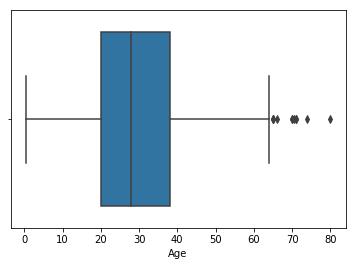

In [7]:
sns.boxplot('Age',data=titanic)

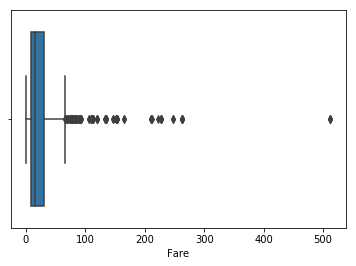

In [8]:
sns.boxplot('Fare',data=titanic)

how to remove the outlier?

In [9]:
##titanic[titanic['Fare']>200]

In [10]:
##titanic.drop(titanic[titanic['Fare']>200].index)
## if u want permantently remove so we put inplace =True

Question1 :- Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)

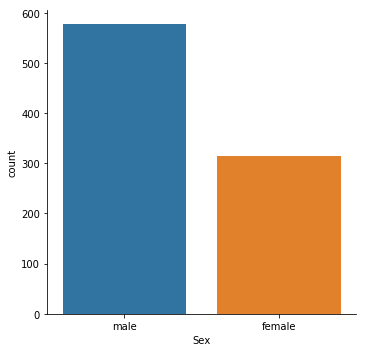

In [11]:
sns.catplot('Sex',data=titanic,kind='count')

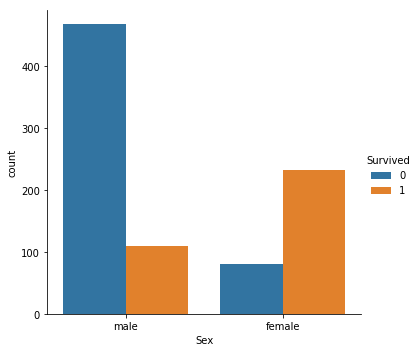

In [12]:
sns.catplot(x='Sex',hue='Survived',data=titanic,kind='count')

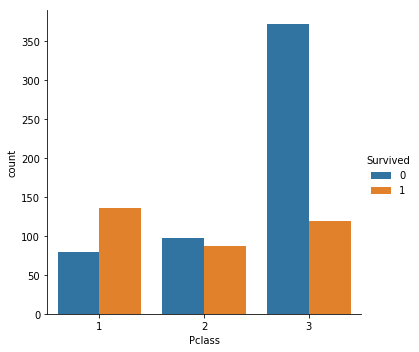

In [13]:
sns.catplot('Pclass',hue='Survived',data=titanic,kind='count')

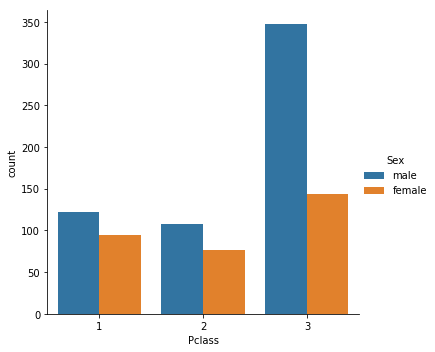

In [14]:
sns.catplot('Pclass',hue='Sex',data=titanic,kind='count')

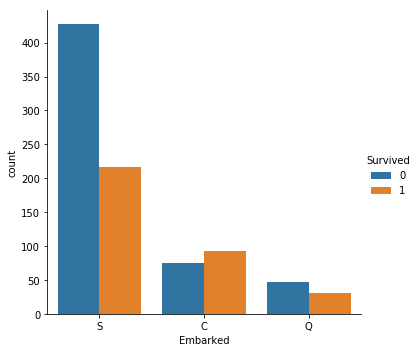

In [15]:
sns.catplot(x='Embarked',hue='Survived' ,data=titanic,kind='count')

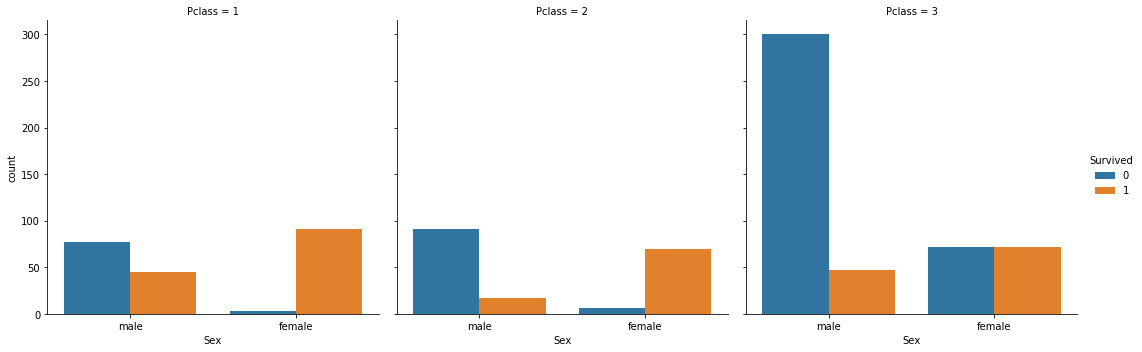

In [16]:
sns.catplot(x='Sex',col='Pclass',hue='Survived',data=titanic,kind='count')

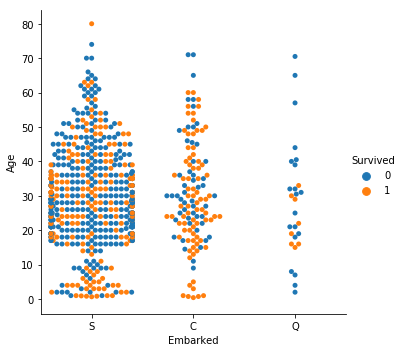

In [17]:
sns.catplot('Embarked','Age',hue='Survived',data=titanic,kind='swarm')

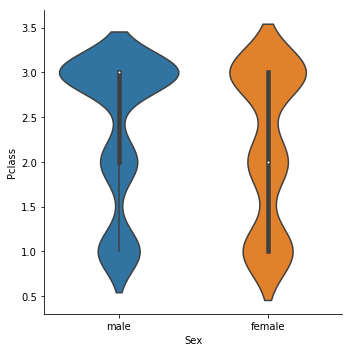

In [18]:
sns.catplot('Sex','Pclass',data=titanic,kind='violin')

In [19]:
def male_female_child(passenger):
    age,sex = passenger
    if age < 16:
        return 'child'
    else:
        return sex

In [20]:
titanic['Person']=titanic[['Age','Sex']].apply(male_female_child,axis=1)
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C,female


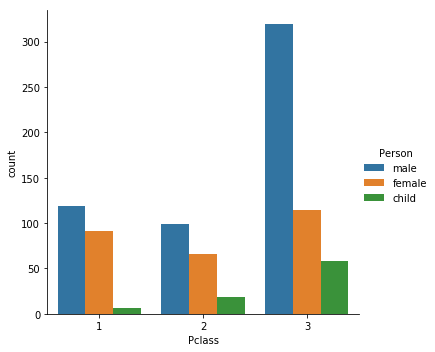

In [21]:
sns.catplot('Pclass',hue='Person',data=titanic,kind='count')

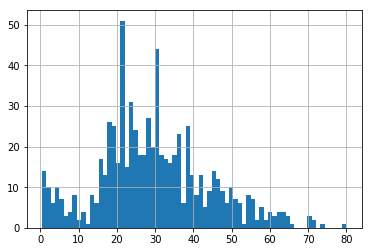

In [22]:
titanic['Age'].hist(bins=70)

In [23]:
# We could also get a quick overall comparison of male,female,child
titanic['Person'].value_counts()

male      537
female    271
child      83
Name: Person, dtype: int64

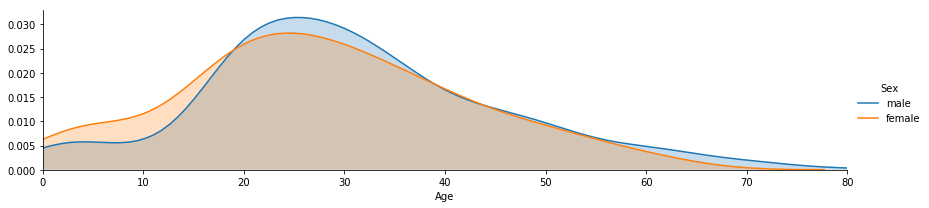

In [24]:
# Set the figure equal to a facetgrid with the pandas dataframe as its data source, set the hue, and change the aspect ratio.
fig = sns.FacetGrid(titanic, hue="Sex",aspect=4)

# Next use map to plot all the possible kdeplots for the 'Age' column by the hue choice
fig.map(sns.kdeplot,'Age',shade= True)

# Set the x max limit by the oldest passenger
oldest = titanic['Age'].max()

#Since we know no one can be negative years old set the x lower limit at 0
fig.set(xlim=(0,oldest))

#Finally add a legend
fig.add_legend()

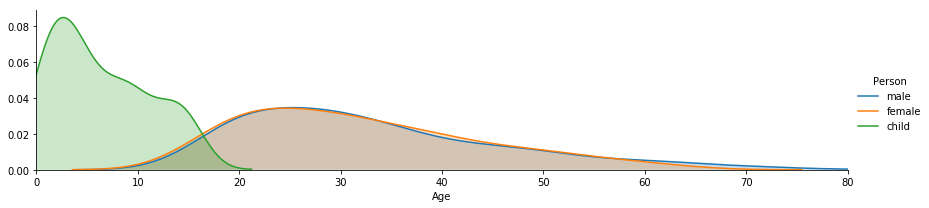

In [25]:
fig = sns.FacetGrid(titanic, hue="Person",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = titanic['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

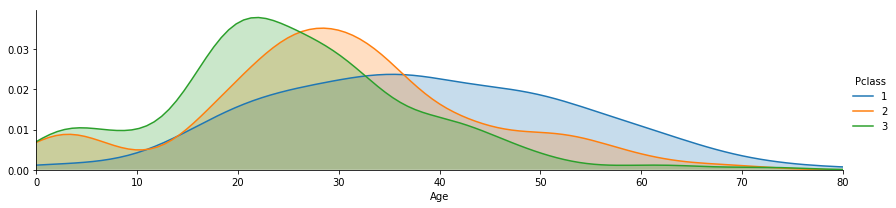

In [26]:
fig = sns.FacetGrid(titanic, hue="Pclass",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = titanic['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

In [27]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S,male


In [28]:
Deck = titanic['Cabin'].dropna()

In [29]:
Deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

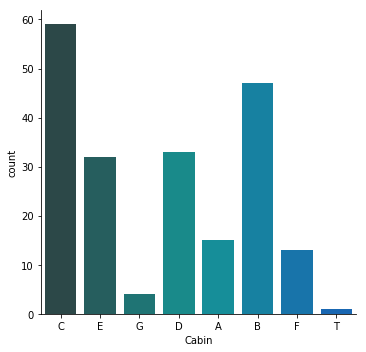

In [30]:
# So let's grab that letter for the deck level with a simple for loop

# Set empty list
levels = []

# Loop to grab first letter
for level in Deck:
    levels.append(level[0])    

# Reset DataFrame and use factor plot
cabin = DataFrame(levels)
cabin.columns = ['Cabin']
sns.catplot('Cabin',data=cabin,palette='winter_d',kind='count')

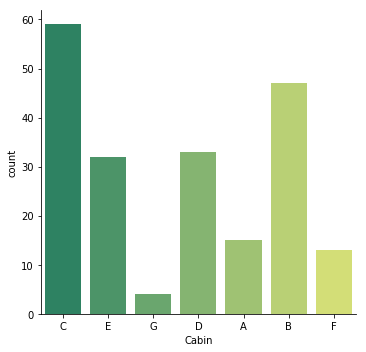

In [31]:
#Redefine cabin_df as everything but where the row was equal to 'T'
cabin = cabin[cabin.Cabin != 'T']
#Replot
sns.catplot('Cabin',data=cabin,palette='summer',kind='count')

Question3 :- Where did the passengers come from?

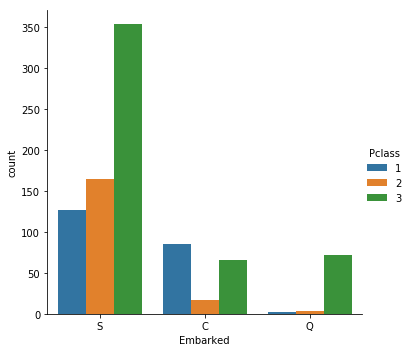

In [32]:
sns.catplot('Embarked',hue='Pclass',data=titanic,kind='count')

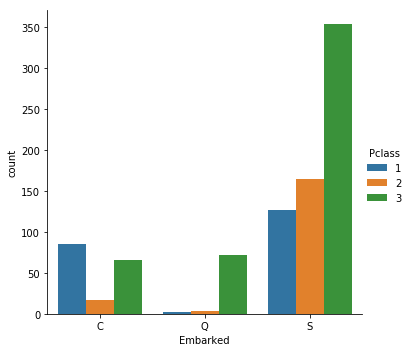

In [33]:
sns.catplot('Embarked',hue='Pclass',data=titanic,kind='count',order=['C','Q','S'])

Question4 :- Who was alone and who was with family?

In [34]:
# Let's start by adding a new column to define alone

# We'll add the parent/child column with the sibsp column
titanic['Alone'] =  titanic.Parch + titanic.SibSp
titanic['Alone'].head()

0    1
1    1
2    0
3    1
4    0
Name: Alone, dtype: int64

In [35]:
# Look for >0 or ==0 to set alone status
titanic['Alone'].loc[titanic['Alone'] >0] = 'With Family'
titanic['Alone'].loc[titanic['Alone'] == 0] = 'Alone'


C:\Users\Ashish\Anaconda3\envs\python\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [36]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S,male,Alone


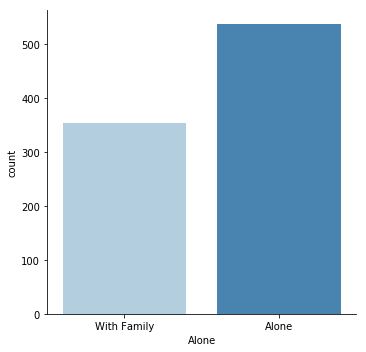

In [37]:
# Now let's get a simple visualization!
sns.catplot('Alone',data=titanic,palette='Blues',kind='count')

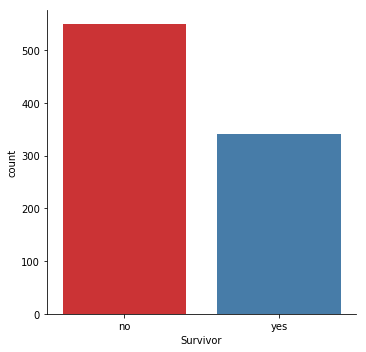

In [38]:
# Let's start by creating a new column for legibility purposes through mapping
titanic["Survivor"] = titanic.Survived.map({0: "no", 1: "yes"})

# Let's just get a quick overall view of survied vs died. 
sns.catplot('Survivor',data=titanic,palette='Set1',kind='count')

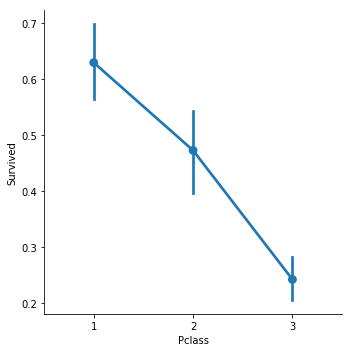

In [39]:
sns.catplot('Pclass','Survived',data=titanic,kind='point')

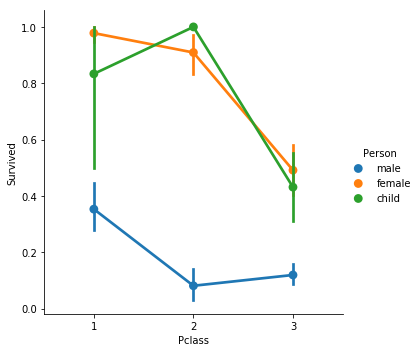

In [40]:
sns.catplot('Pclass','Survived',hue='Person',data=titanic,kind='point')

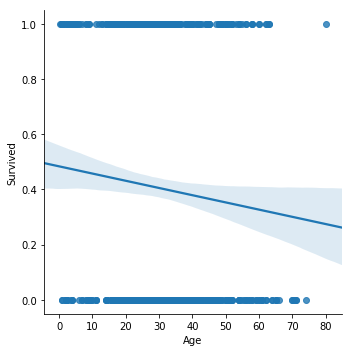

In [41]:
# Let's use a linear plot on age versus survival
sns.lmplot('Age','Survived',data=titanic)

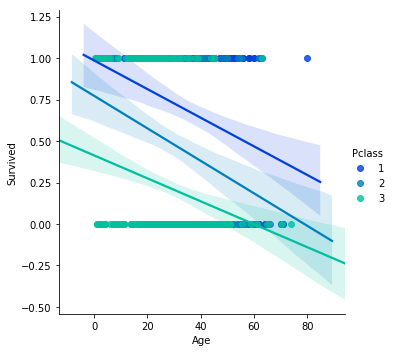

In [42]:
sns.lmplot('Age','Survived',hue='Pclass',data=titanic,palette='winter')

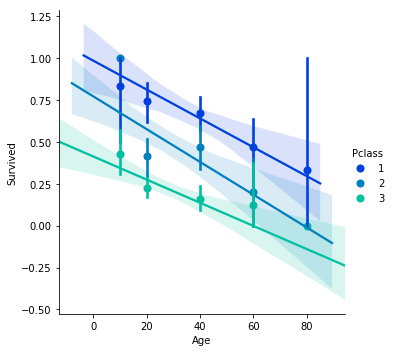

In [43]:
generations=[10,20,40,60,80]
sns.lmplot('Age','Survived',hue='Pclass',data=titanic,palette='winter',x_bins=generations)

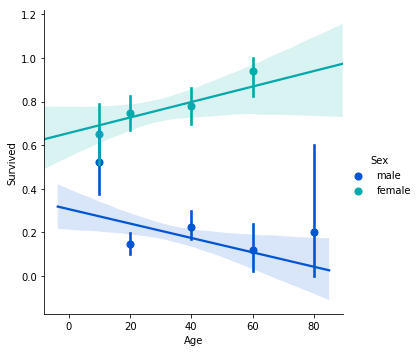

In [44]:
sns.lmplot('Age','Survived',hue='Sex',data=titanic,palette='winter',x_bins=generations)

In [45]:
from IPython.display import Image
Image(url='http://i.imgur.com/DGNjT.gif')

In [46]:
titanic['Person_new']=pd.cut(titanic['Age'], bins=[0,18,30,99], labels=['Child','Young adult','Adult'])

In [47]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone,Survivor,Person_new
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S,male,With Family,no,Young adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C,female,With Family,yes,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S,female,Alone,yes,Young adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S,female,With Family,yes,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S,male,Alone,no,Adult


In [48]:
def survived_male_female(passenger):
    survived,sex = passenger
    if survived == 1:
        return sex
    else:
        return 'no'

In [49]:
titanic['Survived_new']= titanic[['Survived','Sex']].apply(survived_male_female, axis=1)

In [50]:
pd.crosstab(titanic['Sex'],titanic['Survived']) ## they use only categorical nd also limited unique vale

Survived,0,1
Sex,,
female,81,233
male,468,109


In [51]:
pd.crosstab(index=titanic['Sex'],columns=titanic['Survived'],margins=True)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [52]:
pd.crosstab(index=[titanic['Sex'],titanic['Pclass']],columns=[titanic['Survived'],titanic['Embarked']])

Survived        0            1        
Embarked        C   Q    S   C   Q   S
Sex    Pclass                         
female 1        1   0    2  42   1  46
       2        0   0    6   7   2  61
       3        8   9   55  15  24  33
male   1       25   1   51  17   0  28
       2        8   1   82   2   0  15
       3       33  36  231  10   3  34

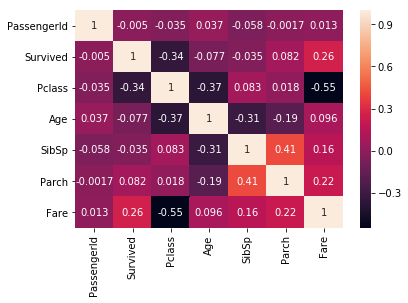

In [53]:
sns.heatmap(titanic.corr(),annot=True)

In [54]:
pd.get_dummies(titanic['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [55]:
pd.get_dummies(titanic['Embarked'])

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


1.) Did the deck have an effect on the passengers survival rate? Did this answer match up with your intuition?


In [64]:
titanic.Cabin.str.split('',expand=True)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,C,8,5,,None,None,None,None,None,None,None,None,None,None,None,None
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,,C,1,2,3,,None,None,None,None,None,None,None,None,None,None,None
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
887,,B,4,2,,None,None,None,None,None,None,None,None,None,None,None,None
888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
889,,C,1,4,8,,None,None,None,None,None,None,None,None,None,None,None


In [67]:
titanic['deck'] = titanic.Cabin.str.split('',expand=True)[1]

In [68]:
titanic['deck']

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: deck, Length: 891, dtype: object

In [69]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone,Survivor,Person_new,Survived_new,deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S,male,With Family,no,Young adult,no,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C,female,With Family,yes,Adult,female,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S,female,Alone,yes,Young adult,female,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S,female,With Family,yes,Adult,female,C
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S,male,Alone,no,Adult,no,NaN


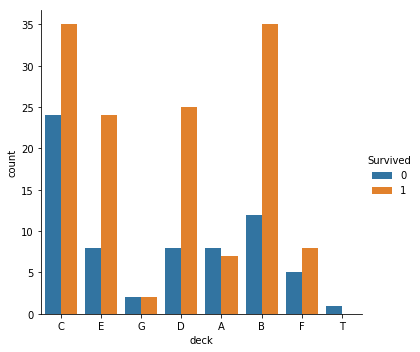

In [71]:
sns.catplot('deck',data=titanic,hue='Survived',kind='count')

In [73]:
titanic.groupby('deck').Survived.sum()

deck
A     7
B    35
C    35
D    25
E    24
F     8
G     2
T     0
Name: Survived, dtype: int64

In [80]:

# Set empty list
levels = []

# Loop to grab first letter
for level in Deck:
    levels.append(level[0])    

# Reset DataFrame and use factor plot
cabin = DataFrame(levels)
cabin
titanic['Cabin']=cabin

In [81]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone,Survivor,Person_new,Survived_new,deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,C,S,male,With Family,no,Young adult,no,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C,C,female,With Family,yes,Adult,female,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,E,S,female,Alone,yes,Young adult,female,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,G,S,female,With Family,yes,Adult,female,C
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,C,S,male,Alone,no,Adult,no,NaN


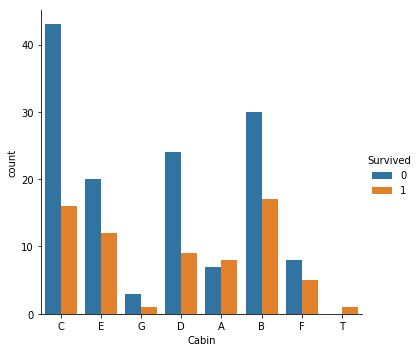

In [82]:
sns.catplot('Cabin',data=titanic,hue='Survived',kind='count')

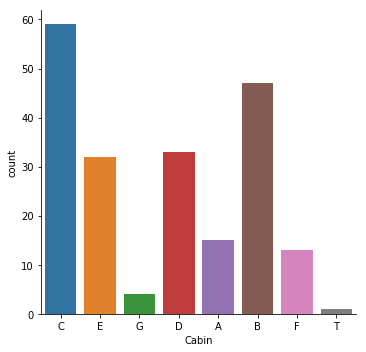

In [83]:
sns.catplot('Cabin',data=titanic,kind='count')

2.) Did having a family member increase the odds of surviving the crash?

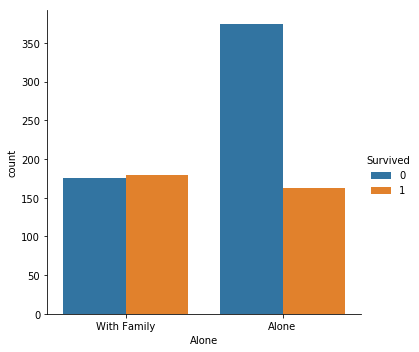

In [86]:
sns.catplot('Alone',data=titanic,hue='Survived',kind='count')

In [87]:
titanic[titanic['Age']>25]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone,Survivor,Person_new,Survived_new,deck
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C,C,female,With Family,yes,Adult,female,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,E,S,female,Alone,yes,Young adult,female,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,G,S,female,With Family,yes,Adult,female,C
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,C,S,male,Alone,no,Adult,no,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.86,A,S,male,Alone,no,Adult,no,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Mr. Frederick James",male,28.00,0,0,C.A./SOTON 34068,10.50,NaN,S,male,Alone,no,Young adult,no,NaN
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.00,0,5,382652,29.12,NaN,Q,female,With Family,no,Adult,no,NaN
886,887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.00,NaN,S,male,Alone,no,Young adult,no,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.00,NaN,C,male,Alone,yes,Young adult,male,C
